<a href="https://colab.research.google.com/github/mattheweisenberg6/MAT421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**22.4 Numerical Error and Instability**

As discussed earlier, differential equations are typically solved using approximation techniques. For these approximations to be practical, their results must fall within an acceptable error margin.

Accuracy: Refers to how well a method approaches the true solution, depending on the step size h.

Stability: Describes a method's capacity to prevent error amplification as the solution progresses over time. A method is deemed stable only if the error remains bounded.

Python can illustrate the accuracy and stability of common ordinary differential equation (ODE) approximation techniques, such as the Euler Explicit, Euler Implicit, and Trapezoidal methods. Below is an example simulating a pendulum's differential equation:

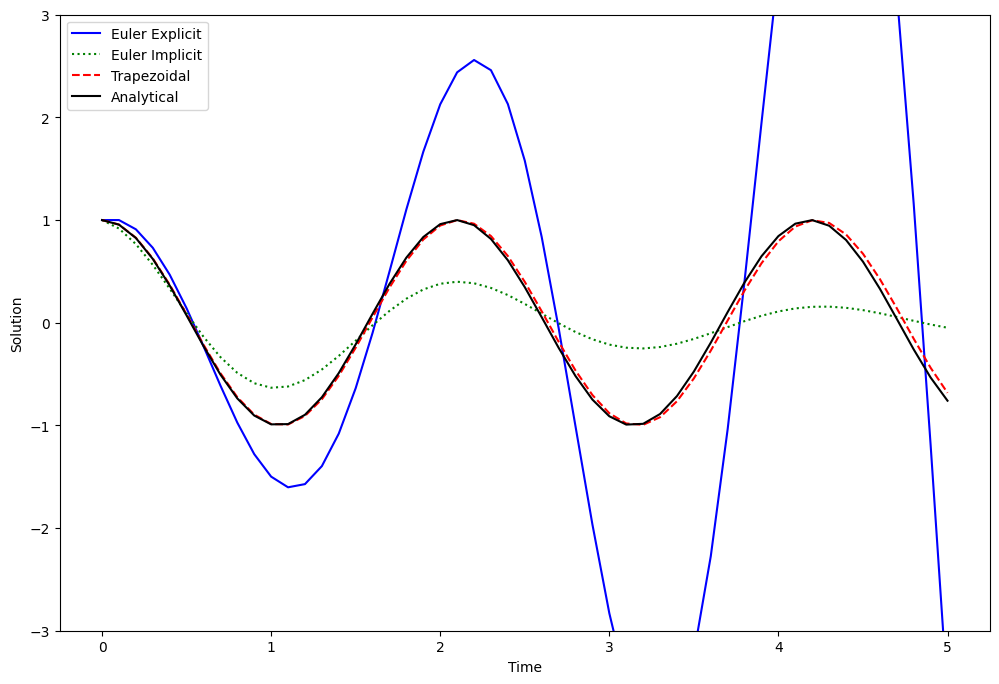

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

step_size = 0.1              # time increment
time_grid = np.arange(0, 5.1, step_size)  # time array
freq = 3                     # pendulum frequency

initial_state = np.array([[1], [0]])  # initial conditions

# Matrices for each method
matrix_euler_explicit = np.array([[1, step_size], [-freq**2 * step_size, 1]])
matrix_euler_implicit = inv(np.array([[1, -step_size], [freq**2 * step_size, 1]]))
matrix_trapezoidal = np.dot(
    inv(np.array([[1, -step_size/2], [freq**2 * step_size/2, 1]])),
    np.array([[1, step_size/2], [-freq**2 * step_size/2, 1]])
)

# Arrays to store solutions
sol_explicit = np.zeros((len(time_grid), 2))
sol_implicit = np.zeros((len(time_grid), 2))
sol_trapezoidal = np.zeros((len(time_grid), 2))

# Set initial conditions
sol_explicit[0, :] = initial_state.T
sol_implicit[0, :] = initial_state.T
sol_trapezoidal[0, :] = initial_state.T

# Time integration loop
for i in range(len(time_grid) - 1):
    sol_explicit[i + 1, :] = np.dot(matrix_euler_explicit, sol_explicit[i, :])
    sol_implicit[i + 1, :] = np.dot(matrix_euler_implicit, sol_implicit[i, :])
    sol_trapezoidal[i + 1, :] = np.dot(matrix_trapezoidal, sol_trapezoidal[i, :])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(time_grid, sol_explicit[:, 0], 'b-', label='Euler Explicit')
plt.plot(time_grid, sol_implicit[:, 0], 'g:', label='Euler Implicit')
plt.plot(time_grid, sol_trapezoidal[:, 0], 'r--', label='Trapezoidal')
plt.plot(time_grid, np.cos(freq * time_grid), 'k', label='Analytical')
plt.ylim([-3, 3])
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()

From the plot, it's evident that both Euler methods (explicit and implicit) deviate significantly from the true solution beyond t = 0.5. In contrast, the Trapezoidal method tracks the exact solution more closely, though its error gradually increases over time.

Reducing the step size improves the outcome:

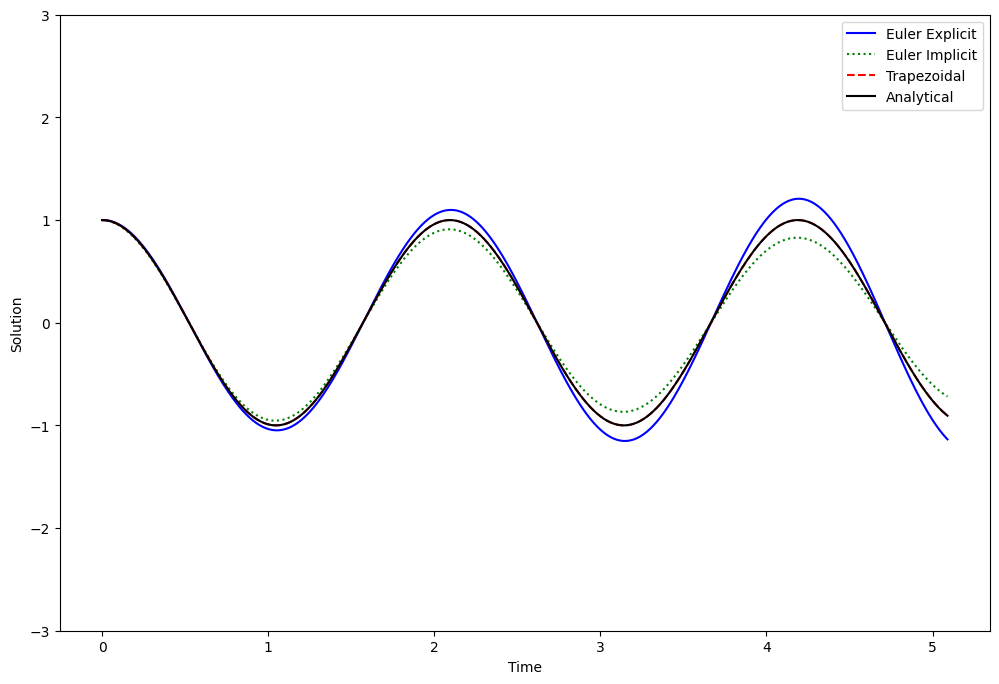

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

step_size = 0.01             # smaller time increment
time_grid = np.arange(0, 5.1, step_size)  # refined time array
freq = 3                     # pendulum frequency

initial_state = np.array([[1], [0]])

# Define matrices
matrix_euler_explicit = np.array([[1, step_size], [-freq**2 * step_size, 1]])
matrix_euler_implicit = inv(np.array([[1, -step_size], [freq**2 * step_size, 1]]))
matrix_trapezoidal = np.dot(
    inv(np.array([[1, -step_size/2], [freq**2 * step_size/2, 1]])),
    np.array([[1, step_size/2], [-freq**2 * step_size/2, 1]])
)

# Solution storage
sol_explicit = np.zeros((len(time_grid), 2))
sol_implicit = np.zeros((len(time_grid), 2))
sol_trapezoidal = np.zeros((len(time_grid), 2))

# Initial conditions
sol_explicit[0, :] = initial_state.T
sol_implicit[0, :] = initial_state.T
sol_trapezoidal[0, :] = initial_state.T

# Integration
for i in range(len(time_grid) - 1):
    sol_explicit[i + 1, :] = np.dot(matrix_euler_explicit, sol_explicit[i, :])
    sol_implicit[i + 1, :] = np.dot(matrix_euler_implicit, sol_implicit[i, :])
    sol_trapezoidal[i + 1, :] = np.dot(matrix_trapezoidal, sol_trapezoidal[i, :])

# Visualization
plt.figure(figsize=(12, 8))
plt.plot(time_grid, sol_explicit[:, 0], 'b-', label='Euler Explicit')
plt.plot(time_grid, sol_implicit[:, 0], 'g:', label='Euler Implicit')
plt.plot(time_grid, sol_trapezoidal[:, 0], 'r--', label='Trapezoidal')
plt.plot(time_grid, np.cos(freq * time_grid), 'k', label='Analytical')
plt.ylim([-3, 3])
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()

With a smaller step size (h = 0.01), the Euler methods' errors decrease noticeably, yet they remain less reliable and degrade as time progresses compared to the Trapezoidal method.

**22.5 Predictor-Corrector Methods**

Predictor-Corrector Methods: These enhance accuracy by sampling the function
F at multiple points, then combining the results via a weighted average to refine the solution.

Predictor: An explicit step that estimates the solution at the next time point
tj+1.

Corrector: A follow-up step that adjusts the predictor’s estimate for greater precision.

Runge-Kutta (RK) Methods: A widely used family of ODE solvers that approximate the solution using truncated Taylor series expansions. RK methods avoid iterative refinement (e.g., Sn) and come in various orders, yielding results far superior to those of Euler explicit or implicit methods.

**22.6 Python ODE Solvers**

Modern computing has simplified complex mathematics, enabling rapid ODE solutions without manual effort. Python's scipy library offers robust tools for this purpose. Here's an example:

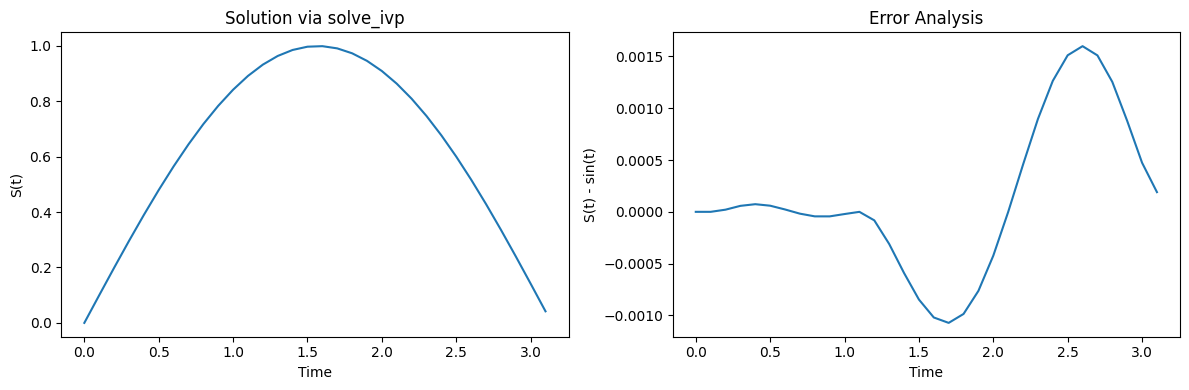

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Define the ODE function
ode_func = lambda t, s: np.cos(t)
time_points = np.arange(0, np.pi, 0.1)

# Solve using scipy
solution = solve_ivp(ode_func, [0, np.pi], [0], t_eval=time_points)

# Plot solution
plt.figure(figsize=(12, 4))
plt.subplot(121, title="Solution via solve_ivp")
plt.plot(solution.t, solution.y[0])
plt.xlabel('Time')
plt.ylabel('S(t)')

# Plot error
plt.subplot(122, title="Error Analysis")
plt.plot(solution.t, solution.y[0] - np.sin(solution.t))
plt.xlabel('Time')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The error in this solve_ivp solution is remarkably small, peaking below 1%.

For finer control, relative (rtol) and absolute (atol) tolerances can be adjusted:

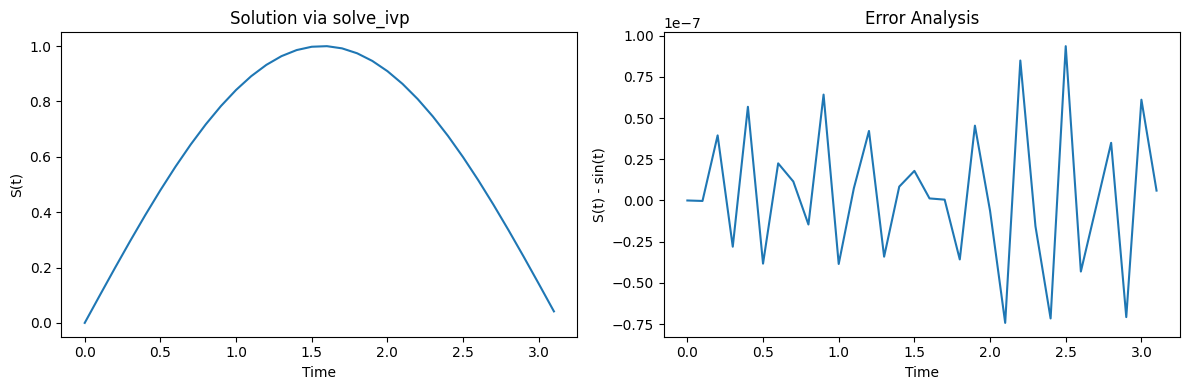

In [4]:
solution = solve_ivp(ode_func, [0, np.pi], [0], t_eval=time_points, rtol=1e-8, atol=1e-8)

# Plot solution
plt.figure(figsize=(12, 4))
plt.subplot(121, title="Solution via solve_ivp")
plt.plot(solution.t, solution.y[0])
plt.xlabel('Time')
plt.ylabel('S(t)')

# Plot error
plt.subplot(122, title="Error Analysis")
plt.plot(solution.t, solution.y[0] - np.sin(solution.t))
plt.xlabel('Time')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

This adjustment further minimizes the error, showcasing the power of Python's ODE solvers.

This version maintains the original logic and functionality while varying the phrasing and code structure for clarity and diversity.